<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


# Adaptive Fourier Filtering


part of 

<font size = "4"> **pyTEMlib**, a **pycroscopy** library </font>


Notebook by 

Gerd Duscher

Materials Science & Engineering<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville


An introduction into Fourier Filtering of images.


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [3]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install git+https://github.com/pycroscopy/pyTEMlib/ -q

# pyTEMlib setup ------------------
else:
    if test_package('sidpy') < '0.0.11':
        print('installing sidpy')
        !{sys.executable} -m pip install  --upgrade sidpy -q     
    if test_package('pyNSID') < '0.0.7':
        print('installing pyNSID')
        !{sys.executable} -m pip install  --upgrade pyNSID 
    if test_package('pyTEMlib') < '0.2022.12.0':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

installing pyNSID
doneRequirement already satisfied: pyNSID in c:\users\gduscher\.conda\envs\ase\lib\site-packages (0.0.6)
  Attempting uninstall: pyNSID
    Found existing installation: pyNSID 0.0.6
    Uninstalling pyNSID-0.0.6:
      Successfully uninstalled pyNSID-0.0.6



## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets. 



In [1]:
import pyNSID
pyNSID.__version__

'0.0.7'

In [2]:
%matplotlib  notebook

import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.insert(0,'../../')

import pyTEMlib
import pyTEMlib.file_tools as ft
import pyTEMlib.image_tools as it

print('pyTEMlib version: ', pyTEMlib.__version__)
note_book_version = '2022.12.10'
note_book_name='pyTEMib/notebooks/Imaging/Adaptive_Fourier_Filter'

You attempted to load a Gwyddion file, but this requires gwyfile.
     Please Load it with pip install gwyfile
You attempted to load a Nanonis file, but this requires Nanonispy.
     Please Load it with pip install nanonispy
You attempted to load a Nanonis file, but this requires Nanonispy.
     Please Load it with pip install nanonispy
Symmetry functions of spglib enabled
pyTEMlib version:  0.2022.12.0


## Open File

These datasets are stored in the pyNSID data format (extension: hf5) automatically. 

All results can be stored in that file. 

First we select the file and the dataset, in case there are several.

In [3]:
datasets = ft.open_file()
chooser = ft.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Channel_001: HAADF'), value='Channel_0…

Now, we open and plot the selected dataset. Select another one and rerun only cell below (Home button gets you back to original).
>
> Please note that you can zoom and drag the intensity values in the colorbar.
>

We really would need an image here


<IPython.core.display.Javascript object>


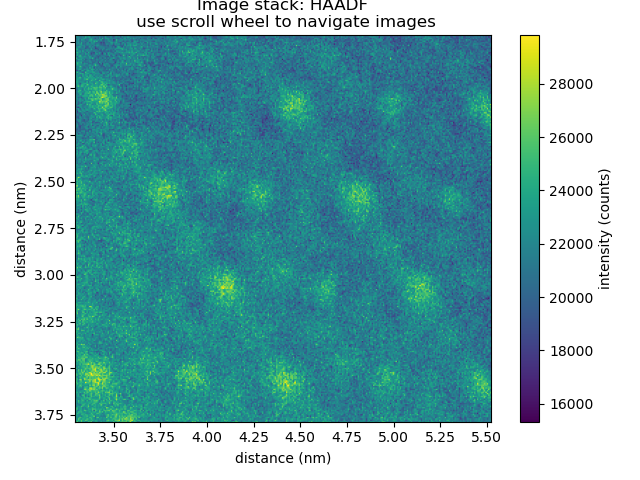

In [8]:
dataset = chooser.dataset

if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')

view = dataset.plot()

In [6]:
dataset.metadata

{'experiment': {'detector': 'HAADF',
  'acceleration_voltage': 60000.0,
  'microscope': 'Titan',
  'start_date_time': 1670623415,
  'probe_mode': 'convergent',
  'convergence_angle': 0.03,
  'stage': {'holder': '',
   'position': {'x': -9.19033350000001e-05,
    'y': 0.0004233313920000001,
    'z': -7.757393220235314e-05},
   'tilt': {'alpha': 0.422865914, 'beta': -0.374486253285408}}},
 'filename': '/mnt/c/Users/gduscher/Documents/2022-Experiment/gduscher/20221209/STEM HAADF 1703.emd'}

## Power Spectrum of Image

In [7]:
power_spectrum = it.power_spectrum(dataset, smoothing=1)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = power_spectrum.plot()

ValueError: Dask array only supports taking an FFT along an axis that 
has a single chunk. An FFT operation was tried on axis 1 
which has chunks (512, 512). To change the array's chunks use dask.Array.rechunk.

## Spot Detection in Fourier Transform

Found 127 reflections


<IPython.core.display.Javascript object>


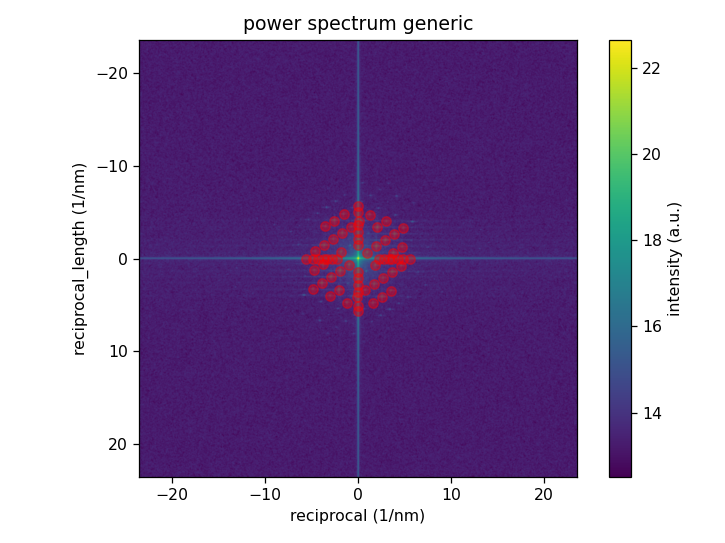

In [16]:
# ------Input----------
spot_threshold=0.1
# ---------------------

spots = it.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)
spots = spots[np.linalg.norm(spots[:,:2],axis=1)<6,:]
spots = spots[np.linalg.norm(spots[:,:2],axis=1)>0.5,:]
power_spectrum.plot()

plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

## Adaptive Fourier Filter

<IPython.core.display.Javascript object>


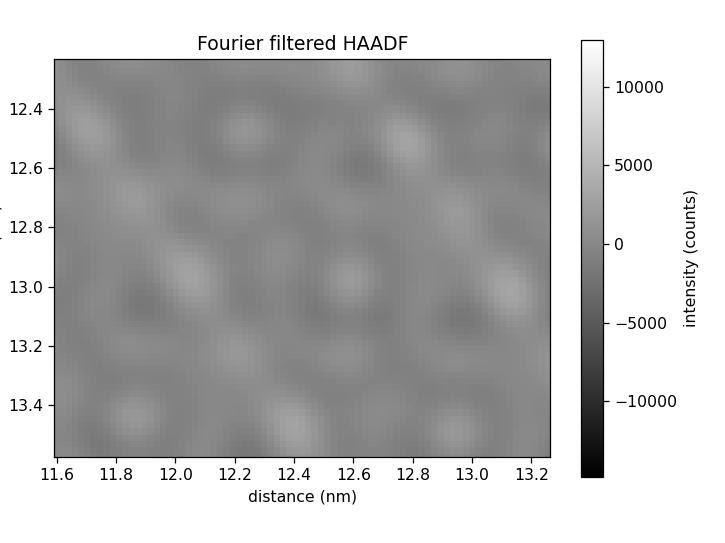

In [17]:
filtered_dataset = it.adaptive_fourier_filter(dataset, spots, low_pass=.0, reflection_radius=.3)
view = filtered_dataset.plot(cmap='gray')

Let's see what we did - In Fourier space, of course.

fft :
	smoothing : 1
	minimum_intensity : 12.047434384958878
	maximum_intensity : 19.12765377072028
source:  generic


<IPython.core.display.Javascript object>


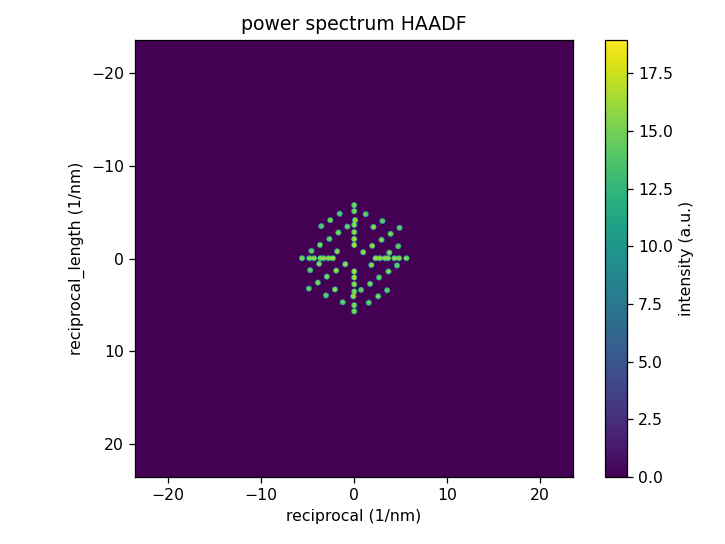

In [18]:
filtered_power_spectrum = it.power_spectrum(filtered_dataset, smoothing=0)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = filtered_power_spectrum.plot()

Please note that the spots are ordered from center to outside.

The third parameter of a spot is its angle.

In [19]:
print(spots[:5])

[[-9.65317383e-01  6.43544922e-01 -9.82793723e-01]
 [ 9.65317383e-01 -6.43544922e-01  2.15879893e+00]
 [ 1.69464442e-12 -1.42499233e+00  3.14159265e+00]
 [ 1.69464442e-12  1.42499233e+00  1.18923056e-12]
 [-1.83869978e+00 -7.35479911e-01 -1.95130270e+00]]


## Log the result

In [20]:
filtered_dataset.title = 'Fourier_Filtered_Image'
datasets.update({'Log_000': filtered_dataset})

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

### Save Datasets to file

In [22]:
group = ft.save_dataset(datasets, filename=dataset.metadata['filename'])

/home/nyd/anaconda3/envs/ase/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:350: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/home/nyd/anaconda3/envs/ase/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:350: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


A convenient function to select a dataset (for further processing, visualization or whatever)

In [27]:
chooser = ft.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

In [31]:
chooser.dataset.metadata

{'analysis': 'adaptive fourier filtered',
 'spots': array([[-9.65317383e-01,  6.43544922e-01, -9.82793723e-01],
        [ 9.65317383e-01, -6.43544922e-01,  2.15879893e+00],
        [ 1.69464442e-12, -1.42499233e+00,  3.14159265e+00],
        [ 1.69464442e-12,  1.42499233e+00,  1.18923056e-12],
        [-1.83869978e+00, -7.35479911e-01, -1.95130270e+00],
        [ 1.83869978e+00,  7.35479911e-01,  1.19028995e+00],
        [ 1.69464442e-12, -2.06853725e+00,  3.14159265e+00],
        [ 1.69464442e-12,  2.06853725e+00,  8.19247720e-13],
        [-2.29837472e+00,  1.69464442e-12, -1.57079633e+00],
        [ 2.29837472e+00,  1.69464442e-12,  1.57079633e+00],
        [-1.93063477e+00,  1.33305734e+00, -9.66490820e-01],
        [ 1.93063477e+00, -1.33305734e+00,  2.17510183e+00],
        [-2.75804967e+00,  1.69464442e-12, -1.57079633e+00],
        [ 2.75804967e+00,  1.69464442e-12,  1.57079633e+00],
        [ 1.69464442e-12, -2.80401716e+00,  3.14159265e+00],
        [ 1.69464442e-12,  2.80401

A tree-like plot of the file

In [32]:
print(dataset.h5_dataset.file.filename)
ft.h5_tree(dataset.h5_dataset.file)

/mnt/c/Users/gduscher/Documents/2022-Experiment/gduscher/20221209/STEM HAADF 1654.hf5
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ HAADF
      -----
      ├ HAADF
      ├ metadata
        --------
        ├ experiment
          ----------
          ├ stage
            -----
            ├ position
              --------
            ├ tilt
              ----
      ├ original_metadata
        -----------------
        ├ Acquisition
          -----------
          ├ AcquisitionDatetime
            -------------------
          ├ AcquisitionStartDatetime
            ------------------------
        ├ BinaryResult
          ------------
          ├ Offset
            ------
          ├ PixelSize
            ---------
        ├ Core
          ----
        ├ CustomProperties
          ----------------
          ├ Aperture[C1].Name
            -----------------
          ├ Aperture[C2].Name
            -----------------
          ├ Aperture[C3].Name
            --

## Close File
let's close the file but keep the filename

In [35]:
dataset.h5_dataset.file.close()

## Simulate new notebook
We can now simulate a new notebook and open the file again.



In [3]:
new_dataset= ft.open_file('/mnt/c/Users/gduscher/Documents/2022-Experiment/gduscher/20221209/STEM HAADF 1654.hf5')
choose_image = ft.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

<IPython.core.display.Javascript object>


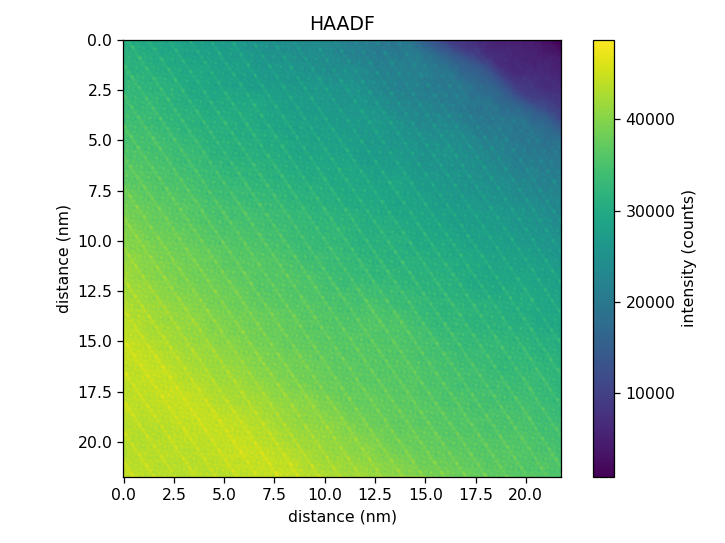

In [5]:
view = choose_image.dataset.plot()

We want to make an image operation of the images in the file.

In [7]:
choose_image = ft.ChooseDataset(new_dataset)
print('       subtract')
choose_image2 = ft.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

       subtract


Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

<IPython.core.display.Javascript object>


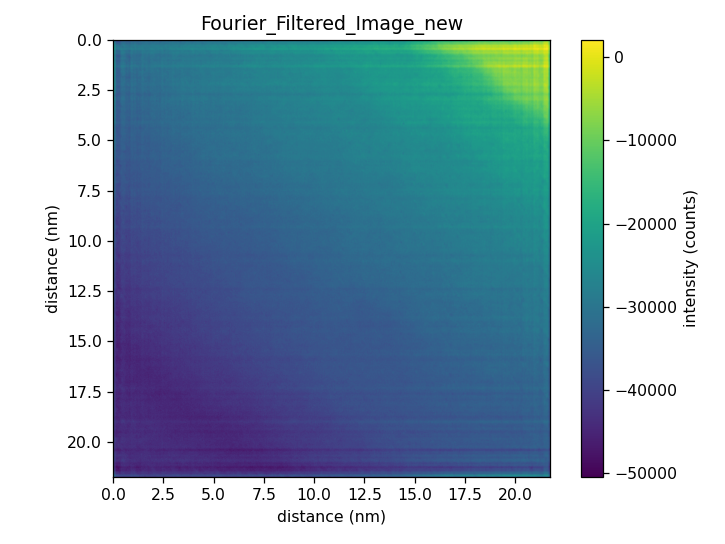

In [10]:
new_image = np.array(choose_image.dataset) - np.array(choose_image2.dataset)
new_image = choose_image.dataset.like_data(new_image)
vew = new_image.plot()